# The baseline model
## Structure

The model looks like this:
![hackathon_model.png](images/hackathon_model.png)

**How do I run this experiment?**

```
# Make sure your PYTHONPATH is set correctly to the root

export PYTHONPATH=/path/to/project:$PYTHONPATH

python3 experiment.py
```

**How do I evaluate the model?**

```
python3 evaluation.py
```


In [1]:
import pandas
import matplotlib.pyplot as plt
import os
root = os.getcwd()

## Training

We trained for 50 epochs and selected the best model according to our validation loss:

In [5]:
training_df = pandas.read_csv(os.path.join(root, "output", "training.log"))
training_df

EmptyDataError: No columns to parse from file

### Training accuracy

In [ ]:
training_acc_columns = [x for x in list(training_df.columns) if "acc" in x]
plt.figure()
training_df[training_acc_columns].plot()
plt.grid(True)
plt.title("Sequence LSTM model with 1 filter")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")

plt.ylim([0.5,1.0])

plt.show()

### Training loss

In [ ]:
training_loss_columns = [x for x in list(training_df.columns) if "loss" in x]
plt.figure()
training_df[training_loss_columns].plot()
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.ylim([0.0,1.0])

plt.show()

## Evaluation

In [2]:
from scipy import stats

with open(os.path.join(root, "output", "base", "two_base.json")) as fp:
    dfb1 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "base", "five_base.json")) as fp:
    dfb2 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "base", "ten_base.json")) as fp:
    dfb3 = pandas.read_json(fp).T
    
with open(os.path.join(root, "output", "two.json")) as fp:
    df1 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "five.json")) as fp:
    df2 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "ten.json")) as fp:
    df3 = pandas.read_json(fp).T

print(stats.wilcoxon(df1.T.values[1], dfb1.T.values[1], alternative="greater"))
print(stats.wilcoxon(df2.T.values[1], dfb2.T.values[1], alternative="greater"))
print(stats.wilcoxon(df3.T.values[1], dfb3.T.values[1], alternative="greater"))

WilcoxonResult(statistic=1053.0, pvalue=9.243657984627427e-07)
WilcoxonResult(statistic=1111.0, pvalue=4.066044533018723e-08)
WilcoxonResult(statistic=1075.0, pvalue=3.195828614174954e-08)


Each point in the boxplot is the accuracy for one subject

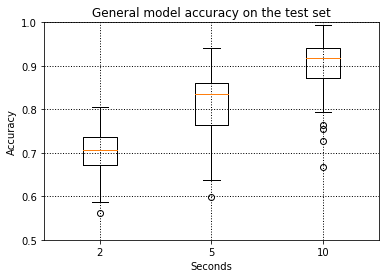

In [3]:
plt.figure()
plt.grid(color='black', linestyle=':', linewidth=1)
plt.boxplot([df1[["acc"]].T.values[0], df2[["acc"]].T.values[0], df3[["acc"]].T.values[0]])
plt.ylim([0.5,1])
plt.ylabel("Accuracy")
plt.xlabel("Seconds")
plt.title("General model accuracy on the test set")
plt.xticks([1, 2, 3], ["2", "5", "10"])
plt.show()